### CNN FREQUENCY

In [1]:
import preprocessor.frequency_preprocessor as preprocessor
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.preprocess(True, True, True)

In [2]:
print(X_train.shape)

(2660, 18, 641)


Load CNN model

In [3]:
from ia.model.cnn.frequency_cnn import FrequencyCNN
frequency_cnn = FrequencyCNN(input_shape=(X_train[0].shape))

In [4]:
frequency_cnn.compile()

In [5]:
NR_EPOCHS = 100
BATCH_SIZE = 250

In [6]:
history = frequency_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/100
11/11 [==============================] - 1s 43ms/step - loss: 0.6753 - accuracy: 0.5113 - val_loss: 0.6393 - val_accuracy: 0.5763
Epoch 2/100
11/11 [==============================] - 0s 18ms/step - loss: 0.6361 - accuracy: 0.6365 - val_loss: 0.6070 - val_accuracy: 0.6891
Epoch 3/100
11/11 [==============================] - 0s 17ms/step - loss: 0.5949 - accuracy: 0.7368 - val_loss: 0.5651 - val_accuracy: 0.7267
Epoch 4/100
11/11 [==============================] - 0s 17ms/step - loss: 0.5502 - accuracy: 0.7669 - val_loss: 0.5392 - val_accuracy: 0.7392
Epoch 5/100
11/11 [==============================] - 0s 17ms/step - loss: 0.5062 - accuracy: 0.7823 - val_loss: 0.5199 - val_accuracy: 0.7437
Epoch 6/100
11/11 [==============================] - 0s 18ms/step - loss: 0.4609 - accuracy: 0.8109 - val_loss: 0.5083 - val_accuracy: 0.7437
Epoch 7/100
11/11 [==============================] - 0s 20ms/step - loss: 0.4229 - accuracy: 0.8327 - val_loss: 0.4986 - val_accuracy: 0.7551
Epoch 

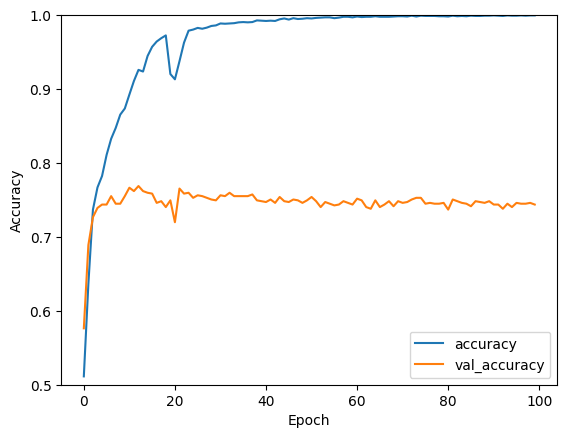

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [8]:
import numpy as np
predictions = frequency_cnn.model.predict(X_test)
predictions = np.array([prediction > 0.5 for prediction in predictions])

for i in range(len(y_test)):
    print("PREDICTION: " + str(predictions[i] > 0.5) + " | " +  "REAL: " + str(y_test[i]))

4/4 [==============================] - 0s 0s/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: Fals

### METRICS:

In [9]:
from ia.metrics.metrics import Metrics
metrics = Metrics(y_test, predictions, frequency_cnn.name(), "frequency")
metrics.all_metrics()
metrics.metrics_to_database()

True Positives: 44
True Negatives: 41
False Positives: 7
False Negatives: 10
total Samples: 102
Accuracy: 0.8333333333333334
Precision: 0.8627450980392157
Sensitivity: 0.8148148148148148
Specificity: 0.8541666666666666
TPR: 0.8627450980392157
FPR: 0.14583333333333334
F1-Score: 0.8239700374531835


ROC curve

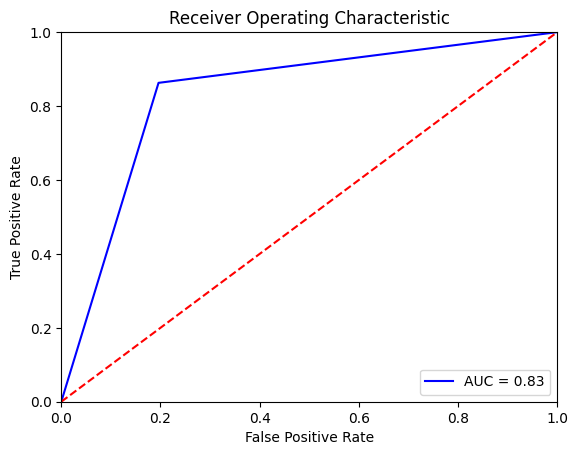

In [10]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()